In [1]:
import numpy as np
from tslearn.datasets import UCR_UEA_datasets
data = UCR_UEA_datasets().load_dataset("ECG200")

In [2]:
import tensorflow.keras as keras

loaded_model = keras.models.load_model("./best_model.hdf5")

In [75]:
%load_ext autoreload 
%autoreload 2

from TSInterpret.InterpretabilityModels.counterfactual.SETSCF import SETSCF
from tslearn.datasets import UCR_UEA_datasets

setscf = SETSCF(loaded_model,data, "TF","time", time_contract_in_mins_per_dim = 1, min_shapelet_len=3, max_shapelet_len=20)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


TypeError: SETSCF.__init__() missing 1 required positional argument: 'initial_num_shapelets_per_case'

In [7]:
len(setscf.shapelets[0]),len(setscf.train_distances[0])

(27, 36)

1/1 [==============================] - 0s 62ms/step
No Counterfactual could be found this data instance


TypeError: unsupported operand type(s) for -: 'float' and 'NoneType'

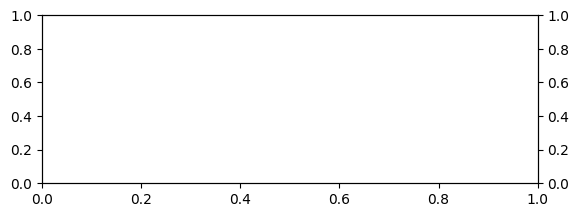

In [76]:
from tslearn.datasets import UCR_UEA_datasets
import tensorflow.keras as keras
ts = 12

exp, exp_label = setscf.explain(ts, data[2][ts],None,None)

loaded_model = keras.models.load_model("./best_model.hdf5")

setscf.plot(
        data[2][ts],
        np.argmax(loaded_model(data[2])[ts]),
        exp,
        exp_label,
        vis_change=True,
        all_in_one=False,
        save_fig=None,
        figsize=(6.4, 4.8))

In [70]:
exp_labels = []
for ts in range(100): 
    exp, exp_label = setscf.explain(ts, data[2][ts],None,None)
    exp_labels.append(exp_label)

WOOOOOOOOOOOOORKS
4/4 [==============================] - 0s 21ms/step
0
1
[[0, 1, 3, 5, 7, 8, 11, 12, 15, 19, 20, 22, 26, 28, 30, 31]]
1/1 [==============================] - 0s 35ms/step
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[[60]
 [61]
 [62]
 [63]
 [64]
 [65]
 [66]
 [67]
 [68]
 [69]
 [70]
 [71]
 [72]
 [73]
 [74]
 [75]
 [76]
 [77]
 [78]] [[60]
 [61]
 [62]
 [63]
 [64]
 [65]
 [66]
 [67]
 [68]
 [69]
 [70]
 [71]
 [72]
 [73]
 [74]
 [75]
 [76]
 [77]
 [78]]
1/1 [==============================] - 0s 27ms/step
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 

In [73]:
exp_labels.index(None)

12